# Assignment 5

### Teaching Assistants:
- Gabriel Humpire: g.humpiremamani@radboudumc.nl
- Peter Bandi: peter.bandi@radboudumc.nl

Please send your notebook **only** to Gabriel and Peter!
Submit a notebook **WITH ALL CELLS EXECUTED!!!**

## Introduction 

<img src="./figures/lungrads.png" alt="LungRADS guidelines" align="right" width="500">

A pulmonary nodule is a small round or oval-shaped growth in the lung. It may also be called a “spot on the lung” or a “coin lesion.” Pulmonary *nodules* are smaller than three centimeters in diameter. If the growth is larger than that, it is called a pulmonary *mass* and is more likely to represent a cancer than a nodule [http://my.clevelandclinic.org/health/articles/pulmonary-nodules].

Nodules can be detected in chest CT images as objects with some kind of rounded shape (even though it is not always the case), which have an intensity that is higher (brighter) than the parenchyma tissue in the lungs.

If a nodule is detected, guidelines have to be followed to decide what is the best management for the patient.
For this purpose, the LungRADS guidelines have been released [https://www.acr.org/quality-safety/resources/lungrads], which describe the type of follow-up analysis based on the type and size of detected nodules.
The main categories of nodules considered in LungRADS are 5:
* solid nodule
* ground-glass nodules (also called GGN, non-solid nodules)
* semi-solid nodules (also called part-solid nodules)
* calcified nodules
* spiculated nodules

<img src="./figures/nodules.png" alt="Nodules" align="right" width="500">

**Solid** nodules are characterized by an homogeneous texture, a well-defined shape and an intensity above -450
Housfield Units (HU) on CT. **Spiculated** nodules appear as solid lesions with characteristics spikes at the border, often considered as an indicator of malignancy. **Non-Solid** nodules (also called ground-glass opacities) have an intensity on CT lower than solid nodules (above -750 HU). **Part-Solid** nodules (also called semi-solid nodules) contain both a non-solid and a solid part, the latter normally referred to as the solid core. Compared with solid nodules, non-solid and part-solid nodules have a higher frequency of being malignant lesions. Finally, **calcified** nodules are characterized by a high intensity and a well-defined rounded shape on CT. If a nodule is completely calcified, it is a benign lesion.

The figure on the right shows the table used in LungRADS, which you can also find in ./literature/AssessmentCategories.pdf.
As you can see, the five categories are mentioned in the table, as well as nodule size.
While nodule size is something that can be easily measured using a segmentation software, the discrimination of nodule types is not trivial. The figure on the right shows examples of pulmonary nodules at different scales. For each nodule, a 2D view in the axial, coronal and sagittal view is shown. 

In this assignment, we are going to develop a system based on machine learning to automatically classify pulmonary nodules detected in chest CT scans. For this purpose, we will use data from the publicly available dataset LIDC-IDRI (https://wiki.cancerimagingarchive.net/display/Public/LIDC-IDRI). In LIDC-IDRI, nodules have been annotated and labeled by four radiologists. Based on their annotations, we extracted a subset of nodules that will be used in this assignment for training and for test purposes.

The idea of this assignment is to develop a multi-class classification system using machine learning, in particular using neural networks. The goal is to achieve the best classification accuracy on the test set, which contains 50 nodules for each class. For each nodule in both the training and test set, we provide both raw data (cubes of 40x40x40 *mm* containing nodules) and a representation of nodules, meaning a feature vector of 256 values (more details are provided later).
The purpose of this assignment is two-fold.
* use the features provided to develop a system based on neural networks to classify pulmonary nodule type
* design and extract new features from raw data, and use them in your classification framework

As an additional (optional) task, you can:
* combine your features with the ones provided and investigate possible improvements

## Data 

We will use data from the publicly available IDC-IDRI dataset (https://wiki.cancerimagingarchive.net/display/Public/LIDC-IDRI).
From this dataset, we selected nodules to use in this assignment. In particular, we made a training set and a test set.
In both sets, five nodule types are included, namely:
* Solid
* Non-solid (ground-glass)
* Part-solid (semi-solid)
* Calcified
* Solid spiculated

**Training set**. The training set contains a distribution of nodules types that resembles what is typically found in radiology: most of the nodules are solid. As a consequence, you will notice that the distributions of classes are skewed.

**Validation set**.
We don't provide a validation set. As part of the assignment, you will be asked to build a validation set yourself.

**Test set**.
The test set contains a balanced distribution of nodules, meaning that we randomly selected the same amount of nodules per class.

You can download the data from this link: https://surfdrive.surf.nl/files/index.php/s/Ajopfe8EF0Vb3qg [password: ismi2017]

### Data details
We provide training and test data in two formats: (a) a **dataset** format and (b) a **raw data** format.

#### Dataset format
The first format is a typical **dataset** format, a matrix, where each row is a sample and each column is a feature. In this
dataset, we provide 256 features per nodule. At this stage, you don't need to care too much about the source of these features (we will tell you more about that later), just consider that these features are somehow descriptive of pulmonary nodules.
The files in dataset format are training_set.npz and test_set.npz.
In the first part of this assignment, you will be asked to train and validate neural networks using the features provided.
The training dataset contains data in the field ['x'] and labels in the field ['y'], while the test set only contains data in the field ['x']. The test set also contains a field ['nodule_ids'], which has unique nodule identifiers that will be used to build the file to submit to *challenger*.
The nodule ID has the following format:

* seriesuid_worldx_worldy_worldz_diameter

where seriesuid is the code that identifies the scan, worldx, y and z indicate the position of the nodule in the scan in world coordinates, and diameter indicates the diameter of the nodule in *mm*. The position is not really important in this assignment, since we extracted the nodules from the scans for you, but in case you want to trace back these nodules, you know where you can find them in the LIDC-IDRI scans. The diameter may be useful in the second part of this assignment.

#### Raw data format
We also provide raw nodule data, because in the second part of this assignment, you will be asked to train and validate neural networks using raw nodule data. In this part of the assignment, raw data will be available, meaning that you will have the chance of processing data as you like, directly feeding data to the neural network, or extracting additional features, etc.
Since pulmonary nodules are extracted from CT scans, raw data is 3D data.
Therefore, what we provide is a *cube* for each nodules with size 64x64x64 px, which corresponds to 40x40x40*mm* (we resampled the scans before nodule extraction).

In the training set, raw nodule data is organized in folders grouped per nodule type. We think that this may be convenient for you. Cubes are stored as npz files, and HU intensities are stored in the field ['data'], while the class label is stored in the field ['label'] for each nodule. Each file is named using the nodule_id, where we also append the actual nodule label at the end of the file name.

In the test set, you will find a similar structure as for the training set, but labels are not provided and nodules are not organized in folders.

# Tasks 

### 1. Train a neural network with given nodule-related features (mandatory)
We have computed features of nodules that you can use for this first part of the assignment. The feature vector contains 256 features per sample, you can find them in training/training_set.npz and test/test_set.npz.
* report results using neural networks, experiment with different architectures, hyper-parameters, try with different learning rates and report your experience with it

### 2. Train a neural network with raw nodule data (mandatory)
For the second part of the assignment you will have to deal with raw data, you can find them in the directory 'nodules' for training and test respectively.
* report results using neural networks, experiment with several architectures, hyper-parameters
* design and extract your own features from the raw data provided

### 3. Combine neural networks / features / classifiers to improve the performance (optional)
Combine the features we provided for task 1 with the features that you extracted from raw data.
Use the combination to train a new neural network, or use a combination of classifiers, if you are familiar with other classification models (you can use the sklearn documentation for that). There is no particular constraint in this last (optional) part. Again, the goal is to do a good job on the test set. Be creative!

# Task 1: Train a neural network with given nodule-related features

In [1]:
# import libraries
import numpy as np
import os
import sklearn
import sklearn.neighbors
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import itertools
import time
import random

# you can get warnings fter importing theano, that is fine.
# if you get errors, ask the TAs!
import lasagne
import theano
from theano import tensor as T

In [2]:
data_dir = './data/'# define here the directory where you have your data, downloaded from SURFDrive

In [3]:
# labels for the five classes in this classification problem.
# These are the same names used in folders for raw training data
noduleTypes = ["Solid", "Calcified", "PartSolid", "GroundGlassOpacity", "SolidSpiculated"]
n_classes = len(noduleTypes)
print('Classification problem with {} classes'.format(n_classes))

Classification problem with 5 classes


In [4]:
# convenience function
def get_file_list(path,ext='',queue=''):
    if ext != '': return [os.path.join(path,f) for f in os.listdir(path) if f.endswith(''+queue+'.'+ext+'')],\
                         [f for f in os.listdir(path) if f.endswith(''+queue+'.'+ext+'')]    
    else: return [os.path.join(path,f) for f in os.listdir(path)]

### Get to know your data!
The data you have now is stored in cubes per nodule, but originally belongs <img src="figures/orthogonalviews.jpg" align='right'> to a Chest CT scan. We have three orthogonal orientations: axial, coronal and sagittal orientations. Each cube is $64\times64\times64$ px (40x40x40 *mm*).

Implement a function that, given a cube containing nodule raw 3D data, returns three orthogonal 2D patches, corresponding to the *axial*, *coronal* and *sagittal* view. Use the figure on the right in this notebook as reference.

In [5]:
# convenience function that returns the axial, coronal and sagitaal view given a cube (in numpy format) containing a nodule
def get_ortogonal_patches(x):
    dims = x.shape
    axial = x[32,:,:]
    coronal = x[:,32,:]
    sagittal= x[:,:,32]
    return axial, coronal, sagittal

Now visualize some nodules in the training set in axial, coronal and sagittal orientations using the function that you have implemented.

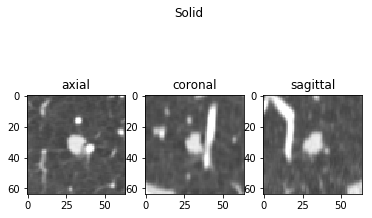

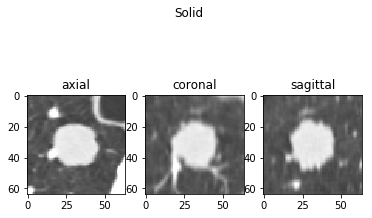

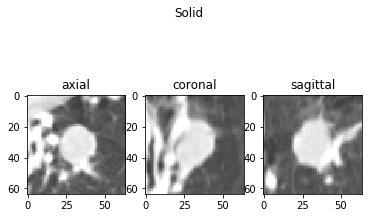

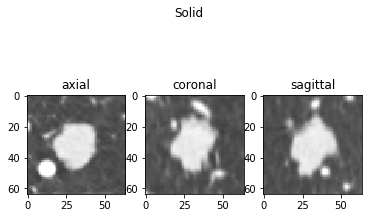

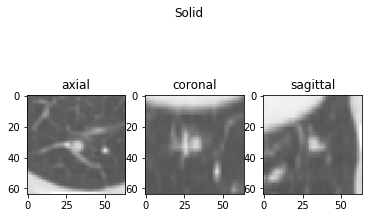

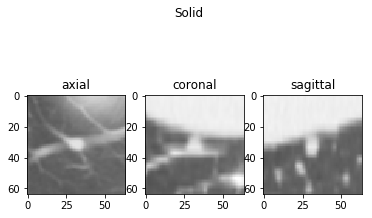

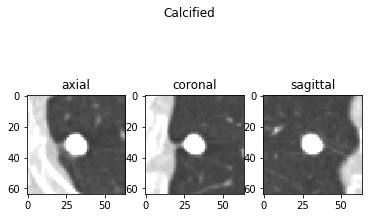

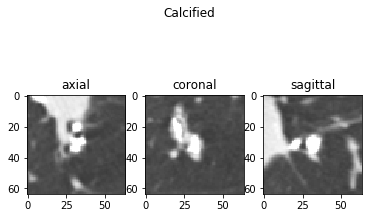

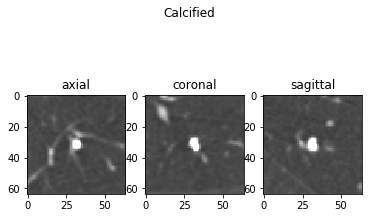

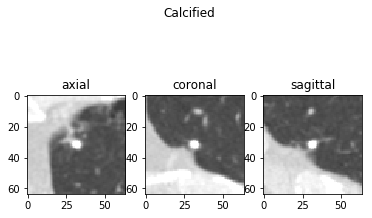

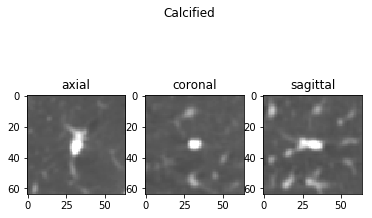

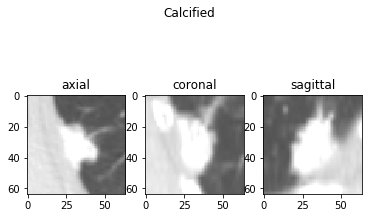

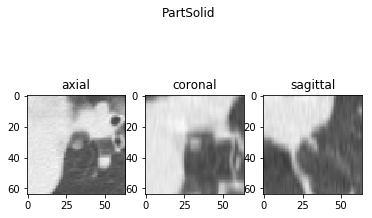

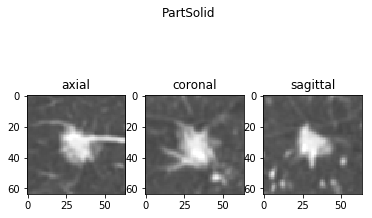

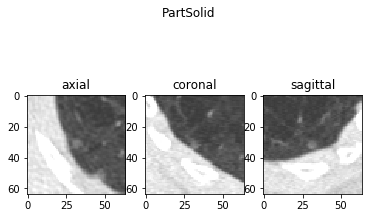

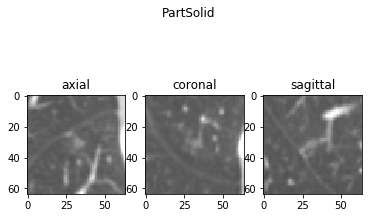

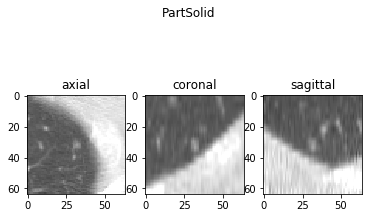

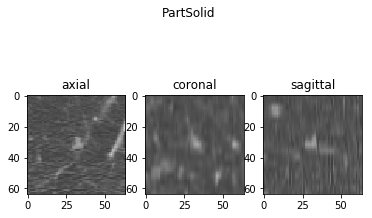

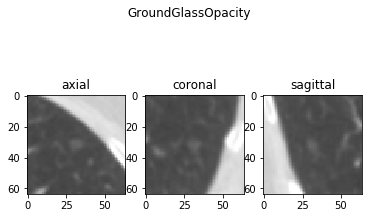

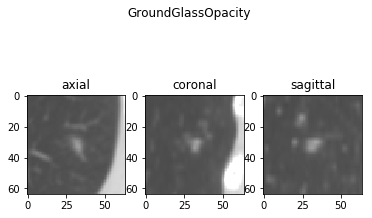

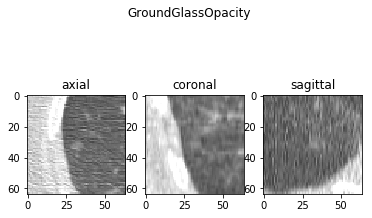

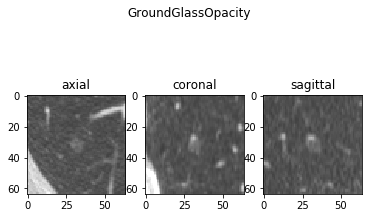

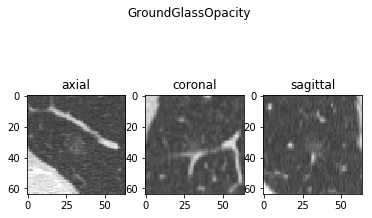

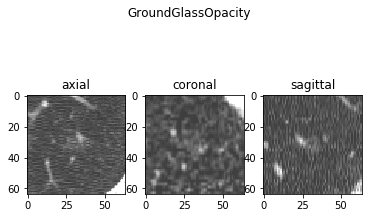

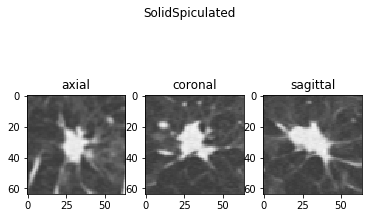

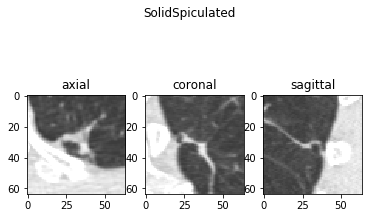

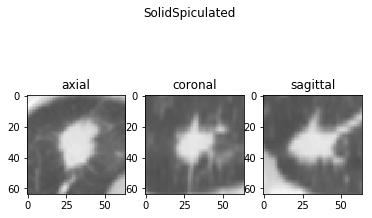

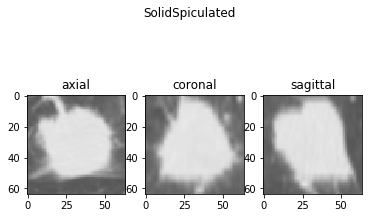

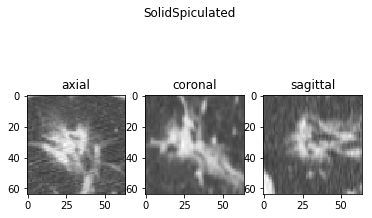

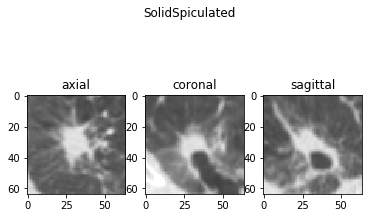

Size of our cubes (64L, 64L, 64L)


In [6]:
src_dir = os.path.join(data_dir, "training", "nodules")
for noduleType in noduleTypes:
    nodules_dir = os.path.join(src_dir, noduleType)
    npzs = get_file_list(nodules_dir, 'npz')
    for idx1, f in enumerate(range(len(npzs[0]))):
        if idx1 > 5:
            continue
        file_path = npzs[0][f]
        filename = npzs[1][f]
        # axes are oriented as (z, x, y)
        npz = np.load(file_path)
        axial, coronal, sagittal = get_ortogonal_patches(npz['data'])
        plt.suptitle(noduleType)
        plt.subplot(1,3,1)
        plt.imshow(axial   , cmap='gray', vmin=-600-800, vmax=-600+800); plt.title('axial')
        plt.subplot(1,3,2)
        plt.imshow(coronal , cmap='gray', vmin=-600-800, vmax=-600+800); plt.title('coronal')
        plt.subplot(1,3,3)
        plt.imshow(sagittal, cmap='gray', vmin=-600-800, vmax=-600+800); plt.title('sagittal')
        plt.show()
        
shape_cube = npz['data'].shape
print 'Size of our cubes',shape_cube

#### Question
Do you think that there is a difference in the quality of patches for the three views? Why?

*Some slices offer a clearer view of the node than others. This does not generally seem to be consistent. In some cases the sagittal projection might be the most insightful, and in other cases, the axial projection is more insightful.*

#### Question
Describe in a few words how each class looks like

*The solid class has clear, somewhat round nodes with a grey-ish intensity.
The calcified class has smaller, more white(high intensity) nodes. 
The partSolid class consists of more abberant nodes, which are less round. They have differing intensities, ranging from grey to white, and are larger.
The GroundGlassOpacity class has low intensity nodes, and is much less clearly defined than the other classes.
The SolidSpiculated class is comparable to the solid class in terms of intensity, but is again more abberant, and has a less round shape.*

#### Question
Explore the data and identify if there are classes which look similar to other classes

*Some of the classes are comparable. Most notably the partSolid class can easily be confused with either the solid or the SolidSpiculated class. Some partSolid class members are more abberant in shape, while some are more round, as the intensities are also comparable, separation of these classes is hard.*

### Load datasets
Here we are going to load the pre-extracted feature vector of 256 features per sample.

In [7]:
# load training data (given features)
npz = np.load(os.path.join(data_dir, 'training', 'training_set.npz'))
x_train = npz['x']
y_train = npz['y']
print x_train.shape
print y_train.shape              

(1795L, 256L)
(1795L,)


In [8]:
# load test data (given features)
npz = np.load(os.path.join(data_dir, 'test', 'test_set.npz') )
x_test = npz['x']
nodule_ids_test = npz['nodule_ids']
print x_test.shape

(243L, 256L)


As we learned few weeks ago, it is always good to pre-process our data to have zero mean and unit standard deviation.

In [9]:
# normalize training data
x_mean = np.mean(x_train, axis=0)
x_std  = np.std(x_train, axis=0)
x_train = (x_train - x_mean)/x_std

In [10]:
# normalize test data
x_test = (x_test - x_mean)/x_std

### Training and validation sets

The dataset we are given does not explicitly provide a validation set.
Therefore, we will have to define one, and consequently update the training set (remove samples used for validation!).

In the following cell, you will implement a function that derives a validation set and a new training set from a given (original) training set. You will use this function to define the subsets that you will be using during training.

In [11]:
from sklearn.model_selection import train_test_split
# function to split training set into training and validation subsets
def split_training_validation_datasets(x, y, val_percentage=0.3, val_balanced=True):
    """
    Derive a training and a validation datasets from a given dataset with
    data (x) and labels (y). By default, the validation set is 30% of the
    training set, and it has balanced samples across classes. When balancing,
    it takes the 30% of the class with less samples as reference.
    """
    if val_balanced:
        least_freq_length = np.inf
        lens = np.zeros(5)
        for i,u in enumerate(np.unique(y)):
            lens[i] = len(y[y==u])
            print lens[i], ' samples of class: ', u
            if lens[i] < least_freq_length:
                least_freq_length = lens[i]
         
        val_samples_per_class = int(val_percentage*least_freq_length)
        
        y_validation = np.zeros(val_samples_per_class*len(np.unique(y)))
        x_validation = np.zeros((val_samples_per_class*len(np.unique(y)),x.shape[1]))
        y_train = np.zeros(len(y)-len(y_validation))
        x_train = np.zeros((len(y)-len(y_validation),x.shape[1]))
        
        sumlens = np.zeros(len(lens)+1)
        sumlens[:5] = np.cumsum(lens)      
        
        
        for i, u in enumerate(np.unique(y)):
            
            randind = np.random.permutation(len(y[y == u]))
            randval = randind[randind<val_samples_per_class]
            randother = randind[randind>=val_samples_per_class]
            
            y_validation[i*val_samples_per_class:(i+1)*val_samples_per_class] = ((y[y == u])[randval])#[val_samples_per_class*i:val_samples_per_class*(i+1)] 
            x_validation[i*val_samples_per_class:(i+1)*val_samples_per_class,:] = ((x[y == u,:])[randval,:])#[val_samples_per_class*i:val_samples_per_class*(i+1),:]
            
            
            y_train[int(sumlens[i-1]-i*val_samples_per_class):int(sumlens[i]-(i+1)*val_samples_per_class)] = ((y[y == u])[randother])
            x_train[int(sumlens[i-1]-i*val_samples_per_class):int(sumlens[i]-(i+1)*val_samples_per_class),:] = ((x[y == u,:])[randother,:])
        
    else:
        x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=val_percentage, stratify = y)    
                
    return x_train, y_train, x_validation, y_validation       


In [12]:
# split dataset
x_train, y_train, x_validation, y_validation = split_training_validation_datasets(x_train, y_train)


1286.0  samples of class:  0.0
193.0  samples of class:  1.0
62.0  samples of class:  2.0
174.0  samples of class:  3.0
80.0  samples of class:  4.0


**Shuffle your training set!** This is necessary when we want to train a neural netowkr using stochastic (mini-batch) gradient descent.

In [13]:
# shuffle training dataset
randind = np.random.permutation(len(y_train))
#print randind
x_train_shuffled = x_train[randind,:]
y_train_shuffled = y_train[randind]

#### Question
Why do you think is important to shuffle the data?

*Shuffling the data is important to prevent a bias caused by the (possible) ordering of the data.*

#### Question
How many samples has each class?

In [14]:
print 'after removing the validation set: '
for u in range(n_classes):
    print len(y_train[y_train == u]), ' samples belong to class: ' + noduleTypes[u]
print 'the number of sample before the removal of the validation set can be found 2 cells earlier'

after removing the validation set: 
1268  samples belong to class: Solid
175  samples belong to class: Calcified
44  samples belong to class: PartSolid
156  samples belong to class: GroundGlassOpacity
62  samples belong to class: SolidSpiculated
the number of sample before the removal of the validation set can be found 2 cells earlier


### kNN classifier

Now that we have defined a training and a validation set, we can define a baseline result by applying kNN classifier (which we have seen in previous assignments), and compute the accuracy on the validation set. If you have made a balanced validation set, accuracy is a good evaluation metric.

In [15]:
# kNN
classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_validation_auto = classifier.predict(x_validation)

Compute the confusion matrix for the results with kNN classifier. In order to compute the **confusion matrix** and the **accuracy**, you can use functions from the sklearn library:

* sklearn.metrics.confusion_matrix()
* sklearn.metrics.accuracy_score()

In [16]:
# confusion matrix
conf_mat_knn  = sklearn.metrics.confusion_matrix(y_validation_auto, y_validation)

# accuracy
acc_knn = sklearn.metrics.accuracy_score(y_validation_auto, y_validation, normalize=True)

print 'Accuracy using kNN: {:.2f}%'.format(100.0*acc_knn)

Accuracy using kNN: 44.44%


You can use the following convenience function to visualize the confusion matrix

In [17]:
def plot_confusion_matrix(conf_mat, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    """
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = conf_mat.max() / 2.
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        plt.text(j, i, conf_mat[i, j], horizontalalignment="center",
                 color="white" if conf_mat[i, j] > thresh else "black")

    plt.tight_layout()
    #Fixed bug with wrong axis labelling
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

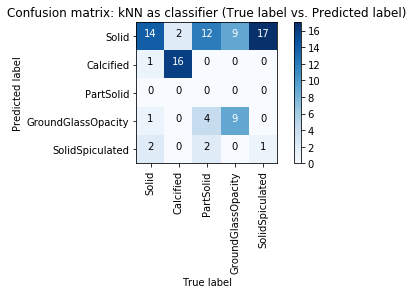

In [18]:
# visualize the confusion matrix
plot_confusion_matrix(conf_mat_knn, classes=noduleTypes,
                      title='Confusion matrix: kNN as classifier (True label vs. Predicted label)')

#### Question
By analyzing the confusion matrix, what are the biggest problems of kNN on this data? Which nodule types are more often confused? Is there a systematic problem? How do you think you can improve this?

*The training data itself is unbalanced. It is therefore likely that the algorithm will predict the largest class. This is the case for the solid class, which is by far the largest. By reweighting, this problem can be alleviated. Note that this is only the case for clases which are harder to discern, as they are likely to have overlap that will be classified as the largest class. This is obviously the case solid vs partsolid, groundglassopacity and solidspiculated. The solid and calcified classes can be easily separated.*

# Classification with Neural Networks
Now that some kind of baseline result has been obtained with kNN, we can start developing a classifier based on neural networks.
For this purpose, we will use the Theano library and the Lasagne library, which implements classes and functions that make building and training neural networks easy.
Theano is a bit of a special Python library, because it is based on symbolic representation of variables, which you may not be familiar with.
For this reason, before we delve into the implementation of our nerual network, we propose a short introduction to Theano and Lasagne, which will clarify some of the doubts and questions you may have about these libraries.

### Theano / Lasagne (short) introduction
Theano is a Python library that lets you to define, optimize, and evaluate mathematical expressions, especially ones with multi-dimensional arrays (numpy.ndarray).

Theano is not a programming language in the normal sense because you write a program in Python that builds expressions for Theano. Still it is like a programming language in the sense that you have to
*	declare variables and give their types
*	build expressions for how to put those variables together
*	compile expression graphs to functions in order to use them for computation.

It is good to think of theano.function as the interface to a compiler which builds a callable object from a purely symbolic graph. One of Theano’s most important features is that theano.function can optimize a graph and even compile some or all of it into native machine instructions.

Theano is a Python library and optimizing compiler for manipulating and evaluating expressions, especially matrix-valued ones. 

Manipulation of matrices is typically done using the numpy package, so what does Theano do that Python and numpy do not?
*	execution speed optimizations: Theano can use g++ or nvcc to compile parts your expression graph into CPU or GPU instructions, which run much faster than pure Python.
*	symbolic differentiation: Theano can automatically build symbolic graphs for computing gradients.
*	stability optimizations: Theano can recognize [some] numerically unstable expressions and compute them with more stable algorithms.

More about Theano: http://deeplearning.net/software/theano/, https://github.com/Theano/Theano.

Lasagne is a lightweight library to build and train neural networks in Theano.

More about Lasagne: https://lasagne.readthedocs.io/en/latest/, https://github.com/Lasagne/Lasagne.


## Building a Neural Network to classify given features

Now we are going to build a neural network with one hidden layer in lasagne. For this particular assingment we are going to use the fully connected layers, also called Dense Layers in Lasagne (visit the following link to get more details of default parameters http://lasagne.readthedocs.io/en/latest/modules/layers/dense.html).

As we have seen in the lecture this week, in order to build our classification framework with neural networks, we have to define and specify parameters for three main components:

1. NETWORK ARCHITECTURE
2. LOSS FUNCTION
3. OPTIMIZATION ALGORITHM

Before we start building our model, we have to define two symbolic variables, for data/features (input) and for labels (targets), which will be used in the definition of the neural network and of the learning algorithm.
You can check all tensor types supported by Theano at this link: http://deeplearning.net/software/theano/library/tensor/basic.html

In [19]:
# input tensors for data and targets
input_var  = T.fmatrix('input')
target_var = T.dmatrix('targets')

### Creating the neural network
Now we can build the architecture of our network.
We will build this first network to have **one hidden layer of 10 neurons**.
Later, we will experiment with a different number of neurons, hidden layers, etc., but let's start with this one.

Keep in mind that the size of the input and of the output layer of your network are given by the data and the classification problem you have to solve.
Therefore, before you start building the network, it is good to check again the dimensionality of data.

In [20]:
data_size = x_train.shape
n_classes = len(noduleTypes)
print data_size
print n_classes

(1705L, 256L)
5


Define the architecture of a neural network with one hidden layer of 10 neurons.
In your implementation, consider what follows:

* it is handy to define a single variable 'network', which initially contains the input layer, and then is passed to other layers as input variable, and also returned as output variable. In this way, the same variable 'network' will be both the input and the output of the current layer. This makes the implementation of a chain of layers easy.

* use sigmoid linearity for the hidden layer (later in this assignment you will also be allowed to use ReLU :-) !)

* use softmax function as output of the network

* use a proper strategy to initialize the parameters of the network (the default initialization of biases in Lasagne is 0, which is fine)

In [21]:
# define neural network with 1 hidden layer
def build_neural_network(data_size, n_classes):
      
    # >>> your code here <<< beginnetje!
    network = lasagne.layers.InputLayer(data_size, input_var=input_var)
    print network.output_shape
    network = lasagne.layers.DenseLayer(network, num_units=10, nonlinearity=lasagne.nonlinearities.sigmoid)
    print network.output_shape
    network = lasagne.layers.DenseLayer(network, num_units=n_classes, nonlinearity=lasagne.nonlinearities.softmax)
    print network.output_shape
    return network

### Loss function
Now that the architecture is defined, we move to the second component of the learning framework, the **loss function**. In order to do that, we first have to define a function that, given the network, gets the predicted probability for a given input sample.
Lasagne offers a function for that, 'get_output()'. Since we are dealing with a multi-class classification problem, categorical cross-entropy seems a reasonable choice.

In [22]:
# get the network
network = build_neural_network(data_size, n_classes)

# get the prediction during training
prediction = lasagne.layers.get_output(network)

# define the (data) loss
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var)
loss = loss.mean()

(1705L, 256L)
(1705L, 10)
(1705L, 5)


If we are using categorical cross-entropy as loss function, we need a representation of labels in the training (and later validation) data in a 'one-hot' form. This means that if we have 5 classes, the format of labels has to be the following:

* y_train = 1 -> [1, 0, 0, 0, 0]
* y_train = 2 -> [0, 1, 0, 0, 0]
* y_train = 3 -> [0, 0, 1, 0, 0]
* y_train = 4 -> [0, 0, 0, 1, 0]
* y_train = 5 -> [0, 0, 0, 0, 1]

We have to define a function that convert the given format into a 'one-hot' format. First, check the format of labels in your dataset, then think how you can convert it into a one-hot format.

In [23]:
def label_to_one_hot(y, n_classes):
    '''
    Convert labels into "one-hot" representation
    '''
    y_one_hot = np.zeros((len(y),n_classes))
    for i in range(n_classes):
        y_one_hot[y == i,i] = 1
    
    # >>> Your code here <<<
    return y_one_hot

Now we can apply the function that converts labels:

In [24]:
# training
print 'Number of samples in training set',y_train.shape
y_train_one_hot = label_to_one_hot(y_train, n_classes)
print y_train_one_hot.shape

# validation
print 'Number of samples in validation set',y_validation.shape
y_validation_one_hot = label_to_one_hot(y_validation, n_classes)
print y_validation_one_hot.shape

# check number of samples per class
print np.sum(y_train_one_hot, axis=0)
print np.sum(y_validation_one_hot, axis=0)

Number of samples in training set (1705L,)
(1705L, 5L)
Number of samples in validation set (90L,)
(90L, 5L)
[ 1268.   175.    44.   156.    62.]
[ 18.  18.  18.  18.  18.]


### Parameters update rule
Now that we have defined the architecture and the loss function, we have to specify how we want to train our model. This means that we first have to indicate which parameters of the network we want to optimize (in our case, all weights and all biases), i.e., made them "trainable", and then define the algorithm used to update the parameters.
In our case, we will use "Stochastic Gradient Descent", which is implemented in Lasagne (as an "update" rule).

As we have seen in the lecture this week, gradient descent algorithms need a 'learning rate', which indicates how much we step in the (opposite) direction of the gradient.
We have also seen that strategy to adapt the learning rate during training are possible, but for the moment we just define a fixed learning rate. Pick a value and see what happens, you can optimize this later.

In [25]:
# learning rate
lr = 0.5

In [26]:
# extract the parameters we want to optimize
params = lasagne.layers.get_all_params(network) # all parameters made "trainable"

# indicate that we will train using SGD
updates = lasagne.updates.sgd(loss, params, lr)

### Check validation performance during training
All the main components required to train our network have been defined now.
However, we have seen that in order to properly monitor the behaviour of a network during training, we should check the performance (the loss) on a separate validation set.
For this purpose, we have to define a function in Theano to measure the loss and the accuracy on the validation set during training. This is similar to what done for the training loss.

Please note that evaluating on the validation set is actually a testing procedure.
For some reasons, in this case a flag 'deterministic=True' has to be set.
The exact reason will become clear next week...

In [27]:
# get the prediction on the validation set during training
val_prediction = lasagne.layers.get_output(network, input_var, deterministic=True)
val_loss = lasagne.objectives.categorical_crossentropy(val_prediction, target_var)
val_loss = val_loss.mean()

# compute the (mean) accuracy
val_acc  = T.mean(T.eq(T.argmax(val_prediction, axis=1), T.argmax(target_var, axis=1)), dtype=theano.config.floatX)

Now we will define the theano functions that make use of all the rules that we have defined so far. This means that Theano will compile the function, which may take a while (if you are using a GPU)...
These functions are based on a symbolic representation of the variables we have defined so far. Since this may be the first time you are working with this kind of variables, we provide the definition of these functions, which are based on theano.function().
In order to better understand what these functions are doing, check the documentation of theano.function() on the Theano website at this link: http://deeplearning.net/software/theano/library/compile/function.html

In [28]:
train_fn  = theano.function([input_var, target_var], loss, updates=updates, name='train')
val_fn    = theano.function([input_var, target_var], [val_loss, val_acc]  , name='validation')
get_preds = theano.function([input_var]            , val_prediction       , name='get_preds')

## Sanity check
As a sanity check for what you have implemented so far, you can run the network to classify the validation set, and measure the accuracy. Think if what you get makes sense.


In [29]:
val_loss, val_acc = val_fn(x_validation.astype(np.float32), y_validation_one_hot.astype(np.float32))
print ('Initial validation accuracy = {:.2f}%'.format(100.*val_acc))

Initial validation accuracy = 20.00%


### Learning procedure
Now we can write the learning algorithm, as we have seen in the lecture this week.
Basically, we will iteratively update the parameters of our network by extracting mini-batches from the training set, until all the training samples have been used. After a complete round, one epoch is done. We repeat this procedure for a number of epochs that you define.
During the training loop, we also want to check the performance of the trained network on the validation set.
Therefore, for each epoch, after a training pass, we also classify the validation set.

We provide the main structure of the learning script, implement the missing parts.

In [30]:
# learning algorithm
n_epochs   = 500
n_mini_batch_training = 55 # number of training mini-batches given the batch_size
batch_size = len(x_train)/n_mini_batch_training # adapt this value based on the memory of your GPU

# lists where we will be storing values during training, for visualization purposes
tra_losses = []
val_losses = []
val_accs   = []

# we want to save the parameters that give the best performance on the validation set
# therefore, we store the best validation accuracy, and save the parameters to disk
best_val_acc = 0

# loop over the number of epochs
for epoch in xrange(n_epochs):
    
    st = time.time()
    
    # training
    cum_tra_loss = 0.0 # cumulative training loss
    for b in range(n_mini_batch_training):
        #this is where we currently have an error. Other than that, everything seems to work!
        x_batch = x_train[b*batch_size:(1+b)*batch_size].astype(np.float32) # extract a mini-batch from x_train
        y_batch = y_train_one_hot[b*batch_size:(1+b)*batch_size] # extract labels for the mini-batch
        print x_batch.shape, y_batch.shape
        mini_batch_loss = train_fn(x_batch, y_batch)
        cum_tra_loss += mini_batch_loss
        
    # validation
    val_loss, val_acc = val_fn(x_validation.astype(np.float32), y_validation_one_hot.astype(np.float32))
    # if the accuracy improves, save the network parameters
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        # save network
        params = lasagne.layers.get_all_param_values(network)
        np.savez('./nn_params.npz', params=params)
    
    tra_loss = None # final training loss for this epoch
    
    # add to lists
    tra_losses.append(tra_loss)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    en = time.time()

    # plot learning curves
    #fig = plt.figure(figsize=(10, 5))
    #tra_loss_plt, = plt.plot(range(len(tra_losses)), tra_losses, 'b')
    #val_loss_plt, = plt.plot(range(len(val_losses)), val_losses, 'g')
    #val_acc_plt, = plt.plot(range(len(val_accs)), val_accs, 'r')
    #plt.xlabel('epoch')
    #plt.ylabel('loss')
    #plt.legend([tra_loss_plt, val_loss_plt, val_acc_plt], 
    #           ['training loss', 'validation loss', 'validation accuracy'],
    #           loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.title('Best validation accuracy = {:.2f}%'.format(100. * best_val_acc))
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    time.sleep(.2)

(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L) (31L, 5L)
(31L, 256L

KeyboardInterrupt: 

## Classification: validation set
Now we can use the trained network to classify the validation set, and check that the performance corresponds to the best value obtained during training. We can compute the accuracy and also visualize the confusion matrix, to get a feeling how well we are doing.

(1705L, 256L)
(1705L, 10)
(1705L, 5)
Accuracy on validation set: 60.00%


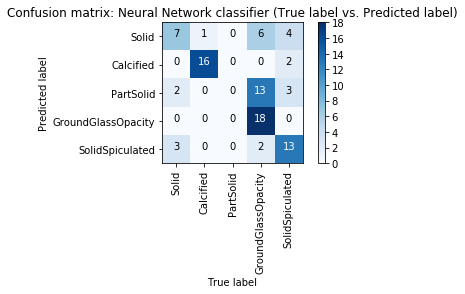

In [34]:
# load the network architecture again
network = build_neural_network(data_size, n_classes) # define the network again, in case you start here
npz = np.load('./nn_params.npz') # load stored parameters
lasagne.layers.set_all_param_values(network, npz['params']) # set parameters

# compile the function again, using the (re)loaded network
val_prediction = lasagne.layers.get_output(network, input_var, deterministic=True)
get_preds = theano.function([input_var]            , val_prediction       , name='get_preds')

# classify validation set
prediction = get_preds(x_validation.astype(np.float32))
y_validation_auto = np.argmax(prediction, axis=1)
conf_mat_nn  = sklearn.metrics.confusion_matrix(np.argmax(y_validation_one_hot, axis=1), y_validation_auto)
acc_nn = sklearn.metrics.accuracy_score(y_validation, y_validation_auto)
print('Accuracy on validation set: {:.2f}%'.format(100. * acc_nn))
plot_confusion_matrix(conf_mat_nn, classes=noduleTypes,
                      title='Confusion matrix: Neural Network classifier (True label vs. Predicted label)')

Use the labels in the validation set to identify the cases that you are misclassifying, and see what the network says about those cases. Use the functions provided at the beginning of this notebook to visualize nodules that have been misclassified. Since the labels in our dataset are given by humans (no ground truth available, only reference standard), there can be some confusion in the way nodules are classified, even in the reference standard.

#### Question
Based on what you have learned about the appearnce of nodules at the beginning of this notebook, do you think you agree with the labels predicted by your network? 

*With just 1 hidden layer the network is performing poorly (see sanity check) the classification could be much better. This is a no for now.*

## Classification: test set
Now we can repeat the classification step on the test set, and submit the results to challenger. During the test procedure, we will save the predictions in a csv file, which will be submitted to challenger.
Please note that the reference standard in challenger has labels y = [1, ..., 5]. Take this into account when making the csv file for your submission.

In [35]:
# load the network architecture again
network = build_neural_network(data_size, n_classes)
npz = np.load('./nn_params.npz')
lasagne.layers.set_all_param_values(network, npz['params'])

# classify test set
n_test_samples = x_test.shape[0]
h_csv = open('./nn_results.csv', 'w')
h_csv.write('nodule_id, label\n')
for n in range(n_test_samples):
    test_sample = None
    nodule_id   = nodule_ids_test[n]
    prediction  = None
    y = np.argmax(prediction[0])
    h_csv.write('{}, {}\n'.format(nodule_id, None))
h_csv.close()

(1705L, 256L)
(1705L, 10)
(1705L, 5)


TypeError: 'NoneType' object has no attribute '__getitem__'

## Submission to challenger
Now we can submit the classification output file to challenger, put a short comment describing your submission.

In [ ]:
import challenger

challenger.submit_results({'username': '',
                           'password': ''},
                          "nn_results.csv",
                          {'notes': 'my first submission'})

## Hyper-parameter optimization
So far, we have implemented a simple network with one hidden layer, 10 neurons and sigmoid activation function.
We also used a constant learning rate, and we have not used regularization.
This means that there is plenty of room for improvement!
For example:
* change the architecture of your network, add neurons, add layers
* change the activation function, try ReLU and see what happens
* change the learning rate, or try to find a strategy to adapt it during training
* try some kind of regularization (L1, L2)

In order to fine-tune these parameters, you may want to expand the main script used for training and validation to include a search for the optimal set of hyper-parameters (cross-validation).
For each experiment:
* provide a clear description of the setup (value, range of parameters used in the search), which we can read and understand when we will be grading your assignment
* save the trained network, which you can load later

In particular, show and explain:
* how the results change by changing the learning parameters/architecture of the network
* how the learning rate worked and how it affected the performance of the neural network

Note that hyper-parameters tuning has to be done using the **validation** set.
When you are happy ith the performance on the vaidation set, you can classify the test set and submit the results to challenger!

# Task 2: Train a neural network with raw nodule data
Now that you have developed your supervised learning framework using the features that we provided, repeat the procedure using raw data as input. You can use the functions provided at the beginning of this notebook to extract 2D views from 3D nodules, which could be useful to develop your network.

Repeat the training procedure, tune the hyper-parameters, and submit the new results.

**MAKE NEW CELLS AND WRITE NEW CODE FOR THIS SECOND PART!!!**

# Task 3: Improve the perfomance (optional)
In this optional task, you can try to improve the performance of your system by combining different types of features, different neural networks etc. Be creative!

### Teaching Assistants:

Send us an email for questions. Remember to send your assignment before Monday midnight.

- Gabriel Humpire: g.humpiremamani@radboudumc.nl
- Peter Bandi: peter.bandi@radboudumc.nl